In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [3]:
df_netflix_titles = pd.read_csv("C:/Users/Santi/Desktop/EAE/TFM/Netflix/titles_Netflix.csv")
df_netflix_titles["Streaming_Service"] = "Netflix"
df_netflix_credits = pd.read_csv("C:/Users/Santi/Desktop/EAE/TFM/Netflix/credits_Netflix.csv")
df_prime_titles = pd.read_csv("C:/Users/Santi/Desktop/EAE/TFM/Prime Video/titles_prime.csv")
df_prime_titles["Streaming_Service"] = "Prime Video"
df_prime_credits = pd.read_csv("C:/Users/Santi/Desktop/EAE/TFM/Prime Video/credits_prime.csv")
df_hulu_titles = pd.read_csv("C:/Users/Santi/Desktop/EAE/TFM/Hulu/titles_Hulu.csv")
df_hulu_titles["Streaming_Service"] = "Hulu"
df_hulu_credits = pd.read_csv("C:/Users/Santi/Desktop/EAE/TFM/Hulu/credits_Hulu.csv")
df_hbo_titles = pd.read_csv("C:/Users/Santi/Desktop/EAE/TFM/HBO/titles_HBO.csv")
df_hbo_titles["Streaming_Service"] = "HBO"
df_hbo_credits = pd.read_csv("C:/Users/Santi/Desktop/EAE/TFM/HBO/credits_HBO.csv")
df_disney_titles = pd.read_csv("C:/Users/Santi/Desktop/EAE/TFM/Diseny+/titles_disney.csv")
df_disney_titles["Streaming_Service"] = "Disney"
df_disney_credits = pd.read_csv("C:/Users/Santi/Desktop/EAE/TFM/Diseny+/credits_disney.csv")

In [4]:
df_list_titles = [df_netflix_titles, df_disney_titles, df_hulu_titles, df_prime_titles, df_hbo_titles]
df_titles = pd.concat(df_list_titles)

In [5]:
df_list_credits = [df_netflix_credits, df_disney_credits, df_hulu_credits, df_prime_credits, df_hbo_credits]
df_credits = pd.concat(df_list_credits)

In [6]:
#Hay que buscar las filas en las que no está bien cargado y eliminarlas
df_titles.sort_values(by=["id"], ascending=True).head(15)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Streaming_Service
85,tm1,Star Wars,MOVIE,Princess Leia is captured and held hostage by ...,1977,PG,125,"['scifi', 'action', 'fantasy']",['US'],NaN,tt0076759,8.6,1321489.0,77.321,8.200,Disney
732,tm10,The Matrix,MOVIE,"Set in the 22nd century, The Matrix tells the ...",1999,R,136,"['scifi', 'action']",['US'],NaN,tt0133093,8.7,1857949.0,71.482,8.200,HBO
319,tm100001,The Lucky Texan,MOVIE,"Jerry Mason, a young Texan, and Jake Benson, a...",1934,NaN,61,"['western', 'action', 'romance']",['US'],NaN,tt0025440,5.6,1213.0,4.079,4.700,Prime Video
9407,tm1000022,Boonie Bears: The Wild Life,MOVIE,Bear brothers Briar and Bramble set off on an ...,2021,NaN,99,"['scifi', 'animation']",['CN'],NaN,tt11654032,5.4,117.0,6.135,3.800,Prime Video
5397,tm1000037,Je suis Karl,MOVIE,After most of her family is murdered in a terr...,2021,R,126,"['drama', 'thriller', 'european', 'romance']","['CZ', 'DE']",NaN,tt9205538,5.4,1077.0,12.981,5.500,Netflix
2171,tm1000070,Bad Luck Banging or Loony Porn,MOVIE,"Emi, a school teacher, finds her career and re...",2021,NaN,106,"['drama', 'comedy']","['HR', 'LU', 'GB', 'RO', 'CH', 'CZ']",NaN,tt14033502,6.6,6465.0,27.554,6.500,Hulu
3261,tm1000095,Deep Down,MOVIE,Mia needs someone to go with her to a fertilit...,2021,NaN,13,[],['US'],NaN,NaN,NaN,NaN,0.600,NaN,HBO
614,tm100013,The Search for Santa Paws,MOVIE,In the tradition of disney's classic holiday t...,2010,G,89,"['family', 'action']",['CA'],NaN,NaN,NaN,NaN,8.059,6.300,Disney
4920,tm1000147,Zone 414,MOVIE,In the near future on a colony of state-of-the...,2021,R,98,"['scifi', 'thriller']",['GB'],NaN,tt8545482,4.9,4146.0,121.562,5.400,Netflix
369,tm100015,Takers,MOVIE,"A seasoned team of bank robbers, including Gor...",2010,PG-13,107,"['action', 'crime', 'drama', 'thriller']",['US'],NaN,tt1135084,6.2,62464.0,15.872,6.228,Netflix


In [7]:
#Hay que buscar duplicados y eliminarlos
df_credits

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR
...,...,...,...,...,...
66388,1224011,tm1067128,Stella Lauri,Marta,ACTOR
66389,2305342,tm1067128,Fabiola Sánchez,Claudia,ACTOR
66390,1245864,tm1067128,Ash Olivera,Nora,ACTOR
66391,2305203,tm1067128,Mariel Garcia Spooner,NaN,DIRECTOR


In [8]:
df_titles.describe()

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,22948.000000,22948.000000,5964.000000,20480.000000,2.043900e+04,22216.000000,20018.000000
mean,2006.568808,78.649425,2.836519,6.358755,2.624706e+04,17.572575,6.516100
std,21.528101,37.370187,3.852331,1.280935,1.037705e+05,94.959570,1.368391
min,1901.000000,0.000000,1.000000,1.000000,5.000000e+00,0.000011,0.500000
25%,2005.000000,48.000000,1.000000,5.600000,2.410000e+02,1.919750,5.800000
50%,2016.000000,86.000000,2.000000,6.500000,1.360000e+03,4.822000,6.600000
75%,2019.000000,102.000000,3.000000,7.300000,8.557000e+03,12.479250,7.400000
max,2022.000000,549.000000,63.000000,9.900000,2.555504e+06,9323.832000,10.000000


In [9]:
df_titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22948 entries, 0 to 3293
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    22948 non-null  object 
 1   title                 22947 non-null  object 
 2   type                  22948 non-null  object 
 3   description           22780 non-null  object 
 4   release_year          22948 non-null  int64  
 5   age_certification     11624 non-null  object 
 6   runtime               22948 non-null  int64  
 7   genres                22948 non-null  object 
 8   production_countries  22948 non-null  object 
 9   seasons               5964 non-null   float64
 10  imdb_id               21015 non-null  object 
 11  imdb_score            20480 non-null  float64
 12  imdb_votes            20439 non-null  float64
 13  tmdb_popularity       22216 non-null  float64
 14  tmdb_score            20018 non-null  float64
 15  Streaming_Service     229

In [10]:
df_titles.isnull().sum()

id                          0
title                       1
type                        0
description               168
release_year                0
age_certification       11324
runtime                     0
genres                      0
production_countries        0
seasons                 16984
imdb_id                  1933
imdb_score               2468
imdb_votes               2509
tmdb_popularity           732
tmdb_score               2930
Streaming_Service           0
dtype: int64

In [11]:
df_titles.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
Streaming_Service        object
dtype: object

In [12]:
df_titles["id"] = df_titles["id"].astype('category')
df_titles["title"] = df_titles["title"].astype('category')
df_titles["type"] = df_titles["type"].astype('category')
df_titles["description"] = df_titles["description"].astype('category')
df_titles["age_certification"] = df_titles["age_certification"].astype('category')
df_titles["genres"] = df_titles["genres"].astype('category')
df_titles["production_countries"] = df_titles["production_countries"].astype('category')
df_titles["Streaming_Service"] = df_titles["Streaming_Service"].astype('category')

In [13]:
df_titles.describe(include='category')

,id,title,type,description,age_certification,genres,production_countries,Streaming_Service
count,22948,22947,22948,22780,11624,22948,22948,22948
unique,22411,21774,2,22230,11,4546,1046,5
top,ts191698,Beauty and the Beast,MOVIE,No overview found.,R,['documentation'],['US'],Prime Video
freq,4,5,16984,5,2711,1544,11525,9871


In [14]:
index = []
for x in range(len(df_titles)):
    index.append(x)

df_titles["Index"] = index

In [15]:
correlation = df_titles.corr(numeric_only=True)
correlation

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Index
release_year,1.000000,-0.057569,-0.439646,0.026076,-0.011167,0.056205,0.140792,-0.036702
runtime,-0.057569,1.000000,-0.032209,-0.155221,0.175839,-0.004495,-0.219229,0.104074
seasons,-0.439646,-0.032209,1.000000,0.052093,0.167027,0.079807,-0.025572,-0.021982
imdb_score,0.026076,-0.155221,0.052093,1.000000,0.205961,0.063164,0.624363,-0.059144
imdb_votes,-0.011167,0.175839,0.167027,0.205961,1.000000,0.180596,0.152727,0.005501
tmdb_popularity,0.056205,-0.004495,0.079807,0.063164,0.180596,1.000000,0.090084,-0.041875
tmdb_score,0.140792,-0.219229,-0.025572,0.624363,0.152727,0.090084,1.000000,-0.105838
Index,-0.036702,0.104074,-0.021982,-0.059144,0.005501,-0.041875,-0.105838,1.000000


<Axes: >

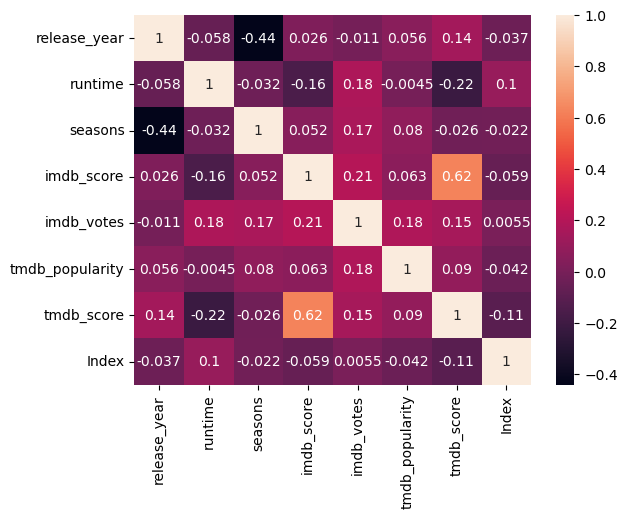

In [16]:
sns.heatmap(correlation,annot=True)

c:\Users\Santi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


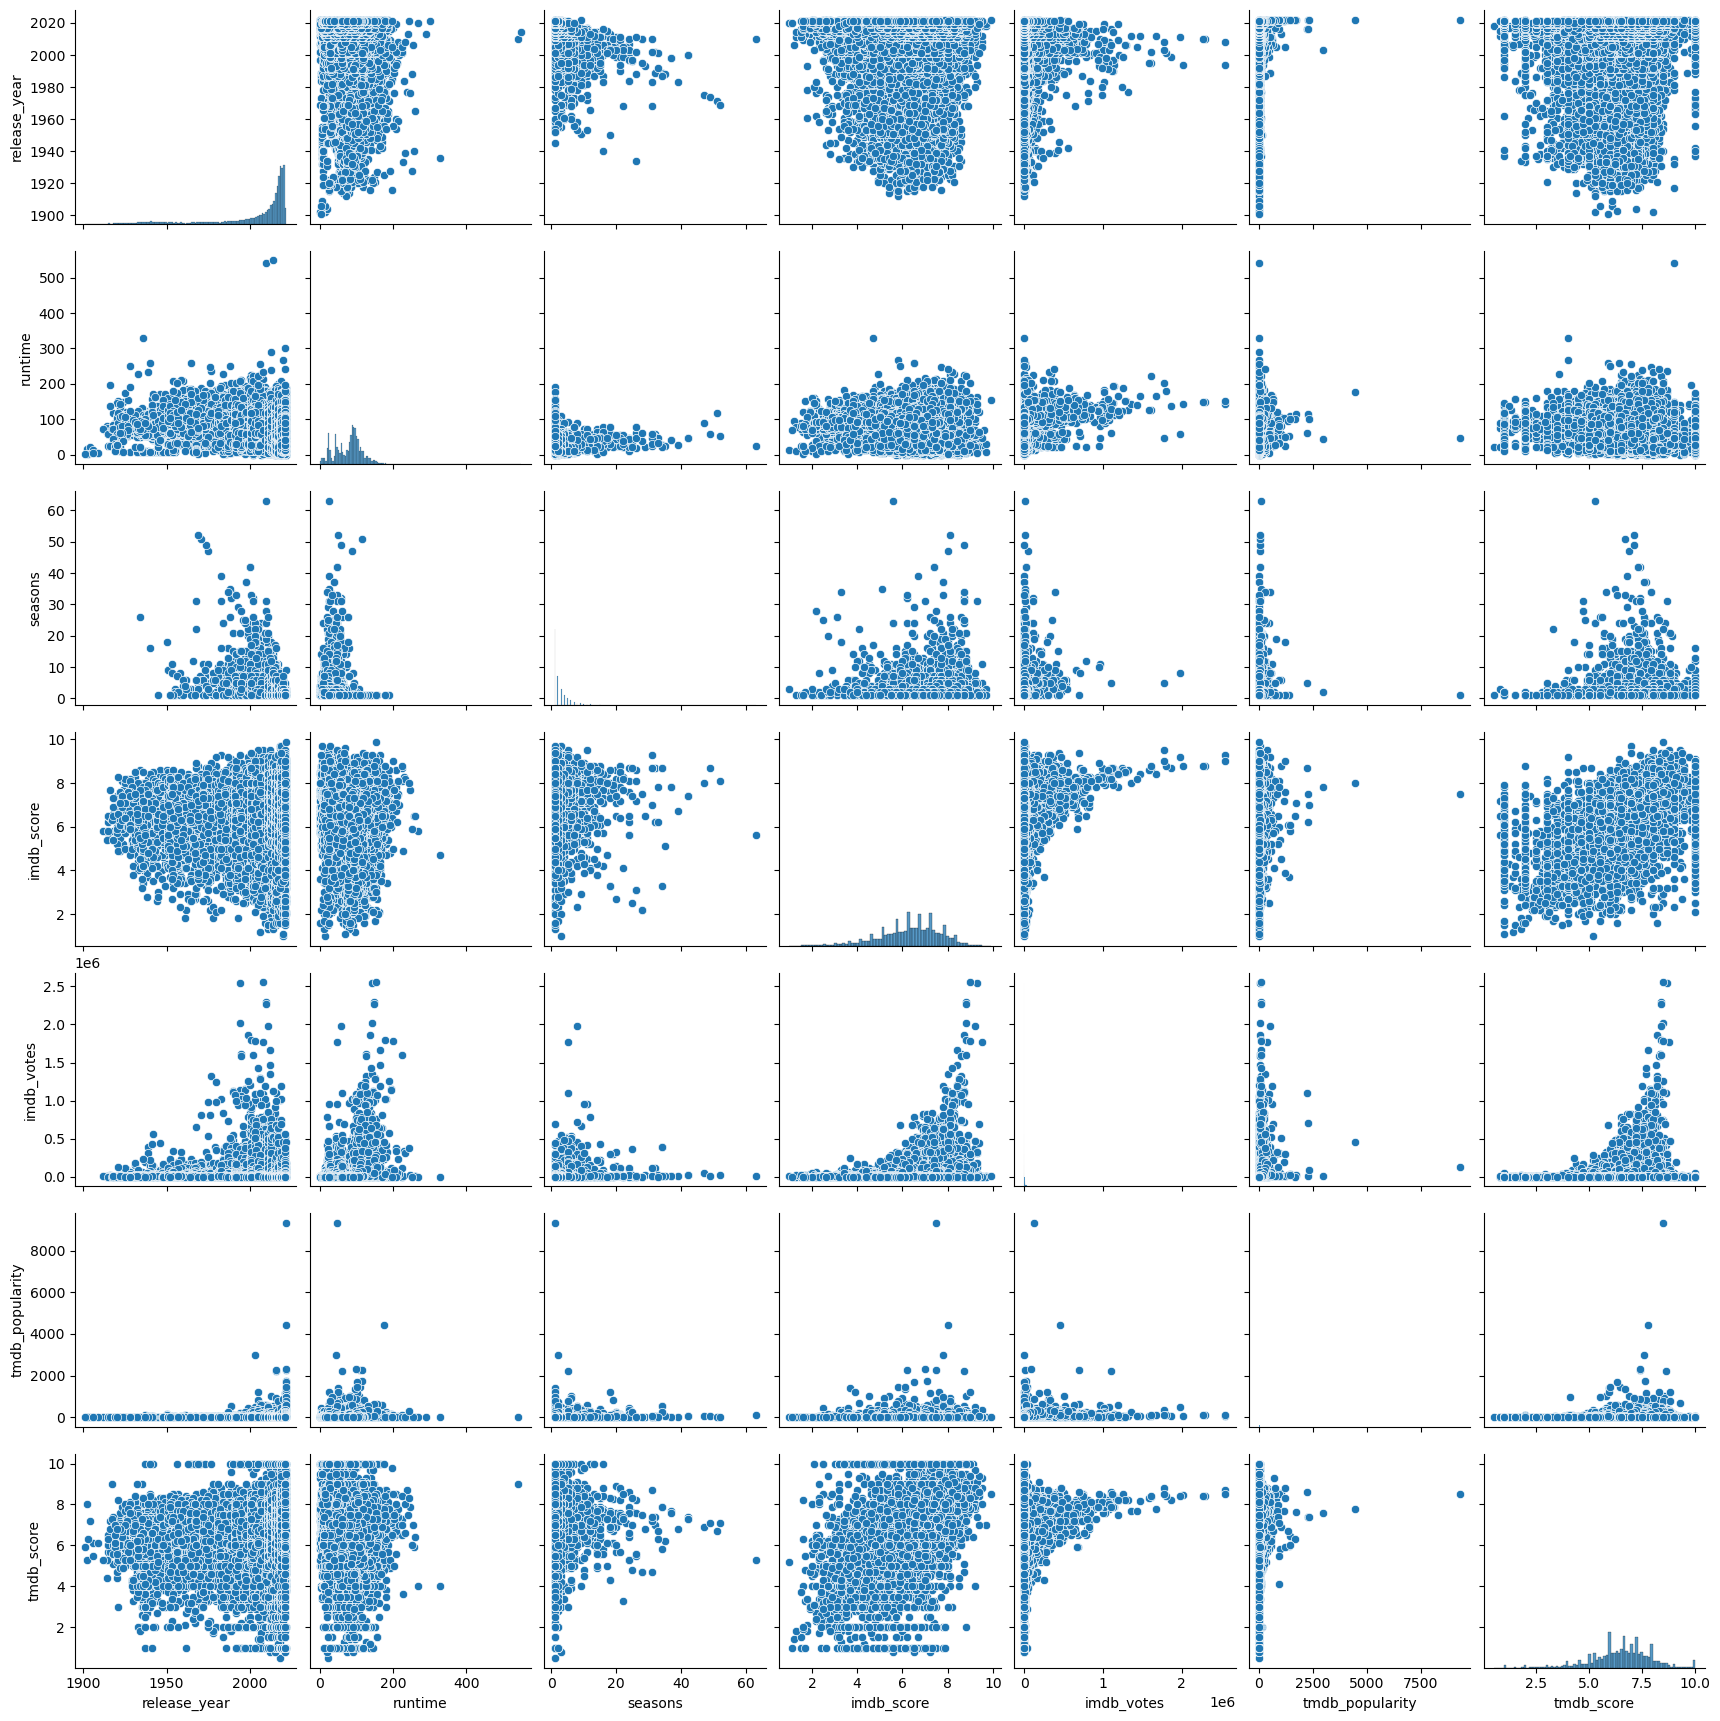

In [17]:
df_titles=df_titles.set_index('Index')
sns.pairplot(df_titles)

In [18]:
streaming_service_type_imdb = df_titles.groupby(['Streaming_Service', 'type'])["imdb_score"].mean().unstack(fill_value=0)

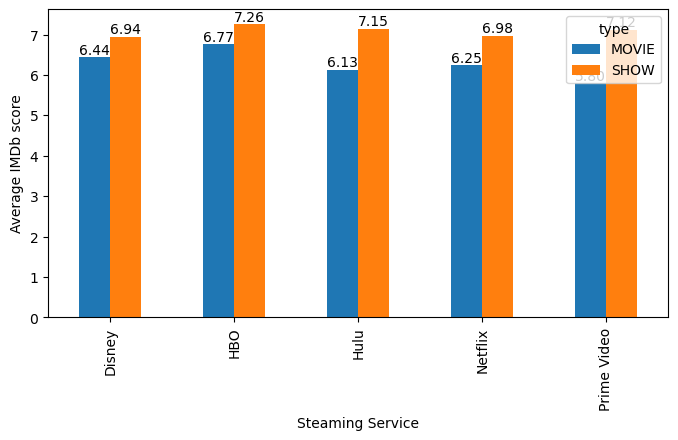

In [19]:
streaming_service_type_imdb.plot(kind='bar', figsize=(8,4))
plt.xlabel("Steaming Service")
plt.ylabel("Average IMDb score")
ax = plt.gca() 


for p in ax.patches: 
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', color='black')


plt.show()


In [20]:
streaming_service_type_year = df_titles.groupby(['Streaming_Service', 'type'])["release_year"].mean().unstack(fill_value=0)

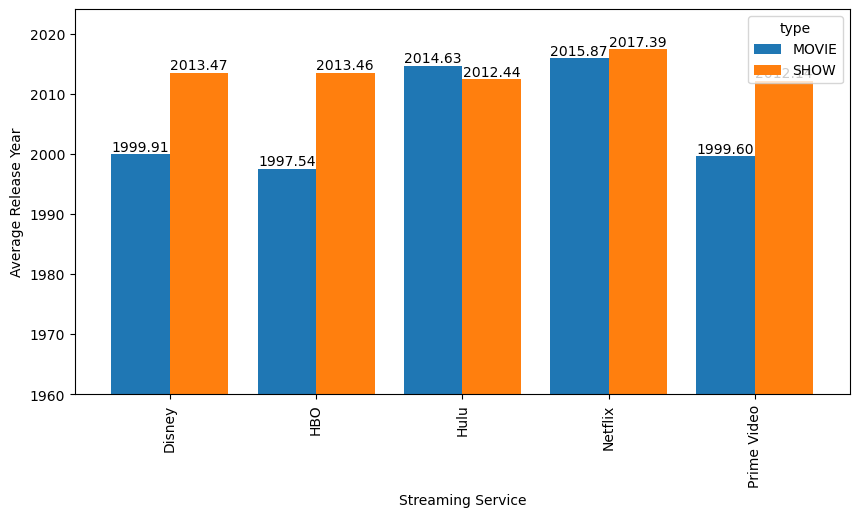

In [21]:
streaming_service_type_year.plot(kind='bar', figsize=(10,5), width=0.8)
plt.xlabel('Streaming Service')
plt.ylabel('Average Release Year')
plt.ylim(1960,2024)
ax = plt.gca()

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', color='black')    
    
plt.show()

In [22]:

# Create dummies
df_titles_dummies = df_titles
genres=[]
countries=[]

for x, y in zip(df_titles_dummies["genres"],df_titles_dummies["production_countries"]):
    genres.append(x.replace("[","").replace("'","").replace("]",""))
    countries.append(y.replace("[","").replace("'","").replace("]",""))
df_titles_dummies["genres"] = genres
df_titles_dummies["production_countries"] = countries
df_genres = df_titles_dummies['genres'].str.get_dummies(sep=', ')
df_countries = df_titles_dummies["production_countries"].str.get_dummies(sep=', ')
df_combined = pd.concat([df_titles_dummies, df_genres, df_countries], axis=1)

df_combined


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,VA,VE,VN,XC,XG,XK,XX,YU,ZA,ZW
Index,,,,,,,,,,,,,,,,,,,,,
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,US,1.0,...,0,0,0,0,0,0,0,0,0,0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"drama, crime",US,NaN,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"drama, action, thriller, european",US,NaN,...,0,0,0,0,0,0,0,0,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"fantasy, action, comedy",GB,NaN,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"war, action","GB, US",NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22943,tm1082718,Romeo Santos: Utopia Live from MetLife Stadium,MOVIE,In this Concert he focuses on the star and mos...,2021,NaN,103,"romance, music",PR,NaN,...,0,0,0,0,0,0,0,0,0,0
22944,tm1067128,Algo Azul,MOVIE,Romantic comedy...coming soon.,2021,NaN,90,comedy,PA,NaN,...,0,0,0,0,0,0,0,0,0,0
22945,tm1121489,Entre Nos: What She Said,MOVIE,A stand-up comedy special featuring Shari Diaz...,2021,NaN,28,comedy,,NaN,...,0,0,0,0,0,0,0,0,0,0


Text(0, 0.5, 'Frecuency')

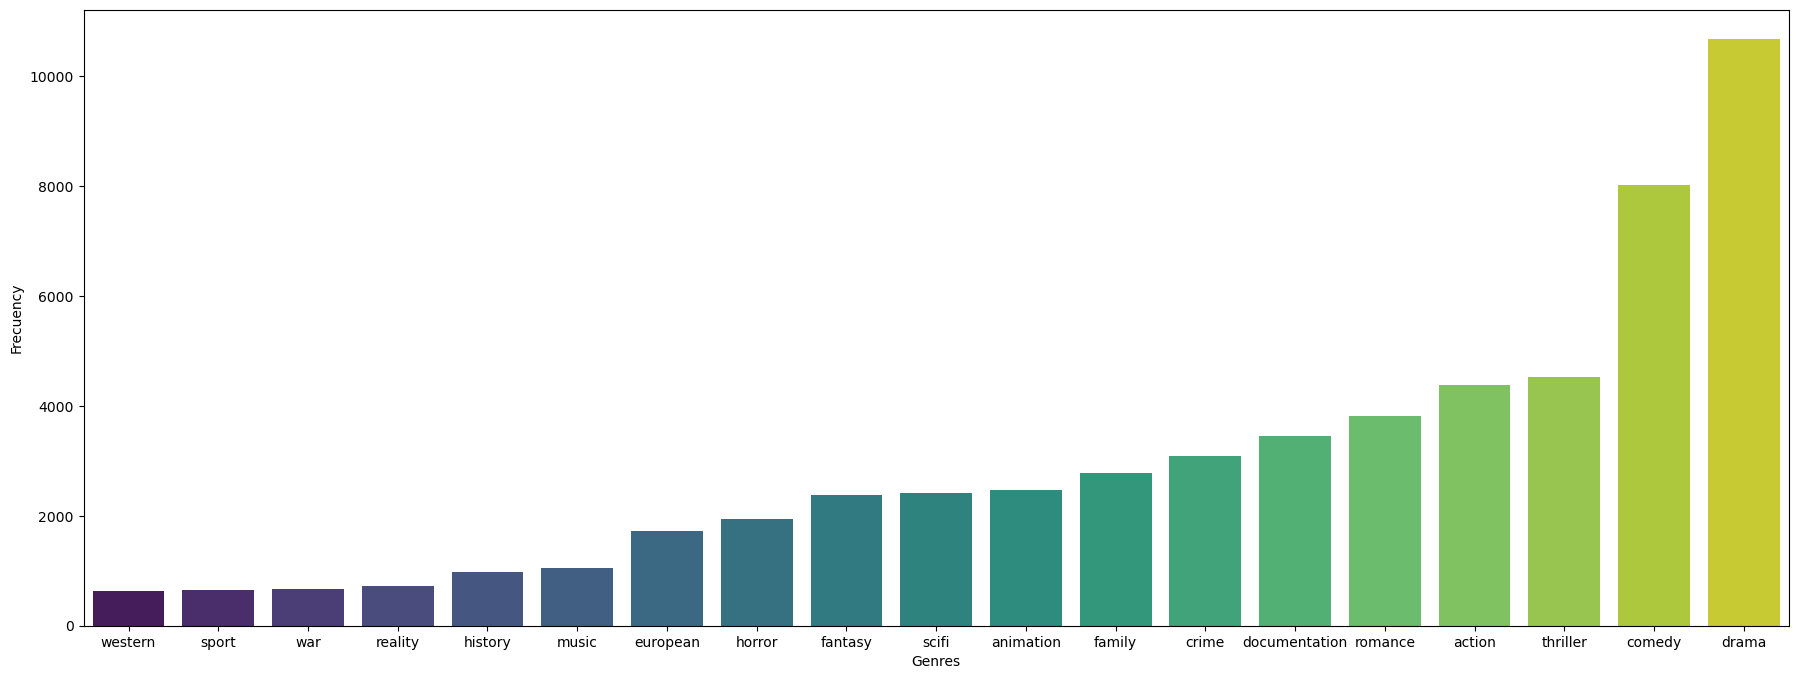

In [23]:
genre_columns = ['action', 'animation', 'comedy', 'crime', 'documentation', 'drama', 'european', 
                 'family', 'fantasy', 'history', 'horror', 'music', 'reality', 'romance', 'scifi', 
                 'sport', 'thriller', 'war', 'western']
genre_counts = df_combined[genre_columns].sum().sort_values(ascending=True)
plt.figure(figsize=(22, 8))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.xlabel('Genres')
plt.ylabel('Frecuency')

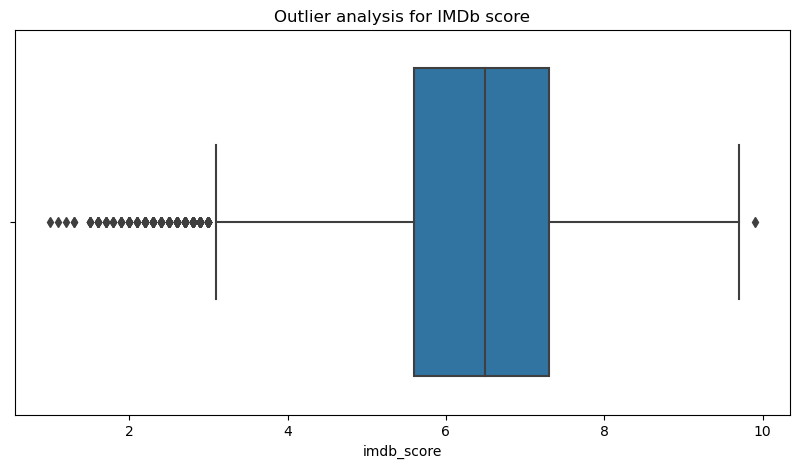

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_combined["imdb_score"])
plt.title('Outlier analysis for IMDb score')
plt.show()

In [25]:
# Compute Q1 and Q2

Q1 = df_combined["imdb_score"].quantile(0.25)
Q2 = df_combined["imdb_score"].quantile(0.75)

IQR = Q2 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q2 + 1.5 * IQR

df_combined_no_outliers = df_combined[(df_combined["imdb_score"]>=lower_bound) & (df_combined["imdb_score"]<= upper_bound)]


In [26]:
print(len(df_combined), len(df_combined_no_outliers))

22948 20187


In [27]:
df_combined_no_outliers.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,VA,VE,VN,XC,XG,XK,XX,YU,ZA,ZW
Index,,,,,,,,,,,,,,,,,,,,,
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"drama, crime",US,NaN,...,0,0,0,0,0,0,0,0,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"drama, action, thriller, european",US,NaN,...,0,0,0,0,0,0,0,0,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"fantasy, action, comedy",GB,NaN,...,0,0,0,0,0,0,0,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"war, action","GB, US",NaN,...,0,0,0,0,0,0,0,0,0,0
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"comedy, european",GB,4.0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
country_to_region = {
    'AE': 'Asia', 'AF': 'Asia', 'AL': 'Europa', 'AM': 'Asia', 'AN': 'América del Norte', 'AO': 'África', 'AQ': 'Antártida', 
    'AR': 'América del Sur', 'AT': 'Europa', 'AU': 'Oceanía', 'BA': 'Europa', 'BD': 'Asia', 'BE': 'Europa', 'BF': 'África', 
    'BG': 'Europa', 'BM': 'América del Norte', 'BO': 'América del Sur', 'BR': 'América del Sur', 'BS': 'América del Norte', 
    'BT': 'Asia', 'BW': 'África', 'BY': 'Europa', 'CA': 'América del Norte', 'CD': 'África', 'CH': 'Europa', 'CI': 'África', 
    'CL': 'América del Sur', 'CM': 'África', 'CN': 'Asia', 'CO': 'América del Sur', 'CR': 'América del Norte', 'CS': 'Europa', 
    'CU': 'América del Norte', 'CY': 'Europa', 'CZ': 'Europa', 'DE': 'Europa', 'DK': 'Europa', 'DO': 'América del Norte', 
    'DZ': 'África', 'EC': 'América del Sur', 'EE': 'Europa', 'EG': 'África', 'ES': 'Europa', 'ET': 'África', 'FI': 'Europa', 
    'FJ': 'Oceanía', 'FO': 'Europa', 'FR': 'Europa', 'GB': 'Europa', 'GE': 'Asia', 'GH': 'África', 'GL': 'América del Norte', 
    'GR': 'Europa', 'GT': 'América del Norte', 'HK': 'Asia', 'HR': 'Europa', 'HU': 'Europa', 'ID': 'Asia', 'IE': 'Europa', 
    'IL': 'Asia', 'IN': 'Asia', 'IO': 'Asia', 'IQ': 'Asia', 'IR': 'Asia', 'IS': 'Europa', 'IT': 'Europa', 'JM': 'América del Norte', 
    'JO': 'Asia', 'JP': 'Asia', 'KG': 'Asia', 'KH': 'Asia', 'KI': 'Oceanía', 'KN': 'América del Norte', 'KR': 'Asia', 'KW': 'Asia', 
    'KZ': 'Asia', 'LB': 'Asia', 'LI': 'Europa', 'LK': 'Asia', 'LT': 'Europa', 'LU': 'Europa', 'LV': 'Europa', 'LY': 'África', 
    'MA': 'África', 'MC': 'Europa', 'MN': 'Asia', 'MT': 'Europa', 'MU': 'África', 'MW': 'África', 'MX': 'América del Norte', 
    'MY': 'Asia', 'NA': 'África', 'NG': 'África', 'NL': 'Europa', 'NO': 'Europa', 'NP': 'Asia', 'NZ': 'Oceanía', 'PA': 'América del Norte', 
    'PE': 'América del Sur', 'PF': 'Oceanía', 'PH': 'Asia', 'PK': 'Asia', 'PL': 'Europa', 'PR': 'América del Norte', 'PT': 'Europa', 
    'PY': 'América del Sur', 'QA': 'Asia', 'RO': 'Europa', 'RS': 'Europa', 'RU': 'Europa', 'RW': 'África', 'SA': 'Asia', 'SE': 'Europa', 
    'SG': 'Asia', 'SI': 'Europa', 'SK': 'Europa', 'SN': 'África', 'SO': 'África', 'SU': 'Asia', 'SV': 'América del Norte', 'SY': 'Asia', 
    'SZ': 'África', 'TC': 'América del Norte', 'TH': 'Asia', 'TN': 'África', 'TR': 'Asia', 'TT': 'América del Norte', 'TW': 'Asia', 
    'TZ': 'África', 'UA': 'Europa', 'UG': 'África', 'US': 'América del Norte', 'UY': 'América del Sur', 'VA': 'Europa', 'VE': 'América del Sur', 
    'VN': 'Asia', 'XC': 'Europa', 'XG': 'Europa', 'XK': 'Europa', 'XX': 'Asia', 'YU': 'Europa', 'ZA': 'África', 'ZW': 'África'
}

# Crear una lista de regiones
regions = list(set(country_to_region.values()))

# Crear columnas para las regiones en el DataFrame
for region in regions:
    df_combined_no_outliers[region] = 0

# Sumar los valores de las columnas de los países para cada región
for country, region in country_to_region.items():
    if country in df_combined_no_outliers.columns:
        df_combined_no_outliers[region] += df_combined_no_outliers[country]

df_combined_no_outliers = df_combined_no_outliers.drop(columns=country_to_region.keys())
df_combined_no_outliers = df_combined_no_outliers.drop(columns=["GQ","KE","Lebanon","MK","PS","SUHH","United States of America"])
# Mostrar el DataFrame resultante
df_combined_no_outliers.head(5)

C:\Users\Santi\AppData\Local\Temp\ipykernel_17388\648239133.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_no_outliers[region] = 0
C:\Users\Santi\AppData\Local\Temp\ipykernel_17388\648239133.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined_no_outliers[region] = 0
C:\Users\Santi\AppData\Local\Temp\ipykernel_17388\648239133.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,thriller,war,western,Antártida,Oceanía,África,Europa,América del Norte,América del Sur,Asia
Index,,,,,,,,,,,,,,,,,,,,,
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"drama, crime",US,NaN,...,0,0,0,0,0,0,0,1,0,0
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"drama, action, thriller, european",US,NaN,...,1,0,0,0,0,0,0,1,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"fantasy, action, comedy",GB,NaN,...,0,0,0,0,0,0,1,0,0,0
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"war, action","GB, US",NaN,...,0,1,0,0,0,0,1,1,0,0
5,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"comedy, european",GB,4.0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
df_train = df_combined_no_outliers[["type","release_year","runtime","seasons","imdb_score","action","animation","comedy","crime","documentation","drama","european","family","fantasy","history","horror","music","reality","romance","scifi","sport","thriller","war","western","América del Sur","América del Norte","África","Europa","Oceanía","Asia","Streaming_Service"]]
df_train.head(5)

,type,release_year,runtime,seasons,imdb_score,action,animation,comedy,crime,documentation,...,thriller,war,western,América del Sur,América del Norte,África,Europa,Oceanía,Asia,Streaming_Service
Index,,,,,,,,,,,,,,,,,,,,,
1,MOVIE,1976,114,NaN,8.2,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,Netflix
2,MOVIE,1972,109,NaN,7.7,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,Netflix
3,MOVIE,1975,91,NaN,8.2,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,Netflix
4,MOVIE,1967,150,NaN,7.7,1,0,0,0,0,...,0,1,0,0,1,0,1,0,0,Netflix
5,SHOW,1969,30,4.0,8.8,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,Netflix


In [30]:
# Create dummies for "type"
df_train = pd.get_dummies(df_train, columns= ["type"], drop_first=True)
df_combined_no_outliers = pd.get_dummies(df_combined_no_outliers, columns=["type"],drop_first=True)
df_train.head(5)

,release_year,runtime,seasons,imdb_score,action,animation,comedy,crime,documentation,drama,...,war,western,América del Sur,América del Norte,África,Europa,Oceanía,Asia,Streaming_Service,type_SHOW
Index,,,,,,,,,,,,,,,,,,,,,
1,1976,114,NaN,8.2,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,Netflix,False
2,1972,109,NaN,7.7,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,Netflix,False
3,1975,91,NaN,8.2,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,Netflix,False
4,1967,150,NaN,7.7,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,Netflix,False
5,1969,30,4.0,8.8,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,Netflix,True


In [31]:
len(df_train)

20187

In [32]:
# Create dummies for "release_year"
year_c=[]
for year in df_train["release_year"]:
    if year <= 1970:
        year_c.append("<1970")
    elif year <= 1980:
        year_c.append("1970s")
    elif year <= 1990:
        year_c.append("1980s")
    elif year <= 2000:
        year_c.append("1990s")
    elif year <= 2010:
        year_c.append("2000s")
    elif year <= 2020:
        year_c.append("2010s")
    elif year <= 2024:
        year_c.append("2020s")
    else:
        year_c.append("")
print(len(df_train["release_year"]), len(year_c))
df_train["release_year"] = year_c
df_combined_no_outliers["release_year"] = year_c

df_train = pd.get_dummies(df_train, columns=["release_year"],drop_first=False)
df_combined_no_outliers = pd.get_dummies(df_combined_no_outliers, columns=["release_year"],drop_first=False)
df_train.head(5)

20187 20187


,runtime,seasons,imdb_score,action,animation,comedy,crime,documentation,drama,european,...,Asia,Streaming_Service,type_SHOW,release_year_1970s,release_year_1980s,release_year_1990s,release_year_2000s,release_year_2010s,release_year_2020s,release_year_<1970
Index,,,,,,,,,,,,,,,,,,,,,
1,114,NaN,8.2,0,0,0,1,0,1,0,...,0,Netflix,False,True,False,False,False,False,False,False
2,109,NaN,7.7,1,0,0,0,0,1,1,...,0,Netflix,False,True,False,False,False,False,False,False
3,91,NaN,8.2,1,0,1,0,0,0,0,...,0,Netflix,False,True,False,False,False,False,False,False
4,150,NaN,7.7,1,0,0,0,0,0,0,...,0,Netflix,False,False,False,False,False,False,False,True
5,30,4.0,8.8,0,0,1,0,0,0,1,...,0,Netflix,True,False,False,False,False,False,False,True


In [33]:
# Replace Nan values for 0 in column "seasons"
df_train["seasons"] = df_train["seasons"].replace(np.nan, 0)
df_train.head(5)

,runtime,seasons,imdb_score,action,animation,comedy,crime,documentation,drama,european,...,Asia,Streaming_Service,type_SHOW,release_year_1970s,release_year_1980s,release_year_1990s,release_year_2000s,release_year_2010s,release_year_2020s,release_year_<1970
Index,,,,,,,,,,,,,,,,,,,,,
1,114,0.0,8.2,0,0,0,1,0,1,0,...,0,Netflix,False,True,False,False,False,False,False,False
2,109,0.0,7.7,1,0,0,0,0,1,1,...,0,Netflix,False,True,False,False,False,False,False,False
3,91,0.0,8.2,1,0,1,0,0,0,0,...,0,Netflix,False,True,False,False,False,False,False,False
4,150,0.0,7.7,1,0,0,0,0,0,0,...,0,Netflix,False,False,False,False,False,False,False,True
5,30,4.0,8.8,0,0,1,0,0,0,1,...,0,Netflix,True,False,False,False,False,False,False,True


In [34]:
# Len of the dataframe with null values
print(len(df_train))

20187


In [35]:
# Avoid null values

df_train = df_train.dropna(how='any', axis=0)

In [36]:
# len of the dataframe without null values
print(len(df_train))

20187


In [37]:
# Training and performance of the model using Random Forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = df_train.drop(columns=["Streaming_Service"])
Y = df_train["Streaming_Service"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

model = RandomForestClassifier(n_estimators = 200, random_state=42)
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 128   26   11   31   36]
 [  19  223   51  110  182]
 [  19   52  151  100  148]
 [  26   75   64  550  331]
 [  41  119   68  300 1177]]
              precision    recall  f1-score   support

      Disney       0.55      0.55      0.55       232
         HBO       0.45      0.38      0.41       585
        Hulu       0.44      0.32      0.37       470
     Netflix       0.50      0.53      0.51      1046
 Prime Video       0.63      0.69      0.66      1705

    accuracy                           0.55      4038
   macro avg       0.51      0.49      0.50      4038
weighted avg       0.54      0.55      0.55      4038



In [46]:
# Try a concrete case
new_case = pd.DataFrame({
    "runtime": [90],
    "seasons": [0],
    "imdb_score": [8],
    "action": [0],
    "animation": [0],
    "comedy": [1],
    "crime": [0],
    "documentation": [0],
    "drama": [0],
    "european": [0],
    "family": [0],
    "fantasy": [1],
    "history": [0],
    "horror": [0],
    "music": [0],
    "reality": [0],
    "romance": [1],
    "scifi": [0],
    "sport": [0],
    "thriller": [0],
    "war": [0],
    "western": [0],
    "América del Sur": [0],
    "América del Norte": [0],
    "África": [0],
    "Europa": [0],
    "Oceanía": [0],
    "Asia": [0],
    "type_SHOW": [0],
    "release_year_1970s": [0],
    "release_year_1980s": [0],
    "release_year_1990s": [0],
    "release_year_2000s": [0],
    "release_year_2010s": [1],
    "release_year_2020s": [1],
    "release_year_<1970": [0]
})
prediction = model.predict(new_case)


results = []
for x in new_case.columns:
    y = int(new_case[x])
    if y != 0:
        results.append(y)
    elif y == 0:
        results.append(y)


C:\Users\Santi\AppData\Local\Temp\ipykernel_17388\503004807.py:45: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  y = int(new_case[x])


In [47]:
# Condición base para el Streaming_Service y type_SHOW
streaming_service_condition = df_combined_no_outliers["Streaming_Service"] == str(prediction).replace("['", "").replace("']", "")
type_show_condition = df_combined_no_outliers["type_SHOW"] == results[28]

# Lista de columnas y sus índices correspondientes en results
columns_and_indices = [
    ("runtime", 0),
    ("seasons", 1),
    ("imdb_score", 2),
    ("action", 3),
    ("animation", 4),
    ("comedy", 5),
    ("crime", 6),
    ("documentation", 7),
    ("drama", 8),
    ("european", 9),
    ("family", 10),
    ("fantasy", 11),
    ("history", 12),
    ("horror", 13),
    ("music", 14),
    ("reality", 15),
    ("romance", 16),
    ("scifi", 17),
    ("sport", 18),
    ("thriller", 19),
    ("war", 20),
    ("western", 21),
    ("América del Sur", 22),
    ("América del Norte", 23),
    ("África", 24),
    ("Europa", 25),
    ("Oceanía", 26),
    ("Asia", 27),
    ("release_year_1970s", 29),
    ("release_year_1980s", 30),
    ("release_year_1990s", 31),
    ("release_year_2000s", 32),
    ("release_year_2010s", 33),
    ("release_year_2020s", 34),
    ("release_year_<1970", 35)
]

# Crear una lista de condiciones dinámicamente
additional_conditions = []

for column, index in columns_and_indices:
    if results[index] != 0:
        additional_conditions.append(df_combined_no_outliers[column] == results[index])

# Si hay condiciones adicionales, combinarlas con OR
if additional_conditions:
    combined_condition = additional_conditions[0]
    for condition in additional_conditions[1:]:
        combined_condition = combined_condition | condition
    
    # Añadir la condición combinada a la condición base
    final_condition = streaming_service_condition & type_show_condition & combined_condition
else:
    # Si no hay condiciones adicionales, usar solo las condiciones base
    final_condition = streaming_service_condition & type_show_condition

# Filtrar el dataframe
df_predicted = df_combined_no_outliers[final_condition]

df_predicted

,id,title,description,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,...,América del Sur,Asia,type_SHOW,release_year_1970s,release_year_1980s,release_year_1990s,release_year_2000s,release_year_2010s,release_year_2020s,release_year_<1970
Index,,,,,,,,,,,,,,,,,,,,,
9784,tm19248,The General,"During America’s Civil War, Union spies steal ...",NaN,78,"action, drama, war, western, comedy, european",US,NaN,tt0017925,8.2,...,0,0,False,False,False,False,False,False,False,True
9785,tm82253,The Best Years of Our Lives,It's the hope that sustains the spirit of ever...,NaN,171,"romance, war, drama",US,NaN,tt0036868,8.1,...,0,0,False,False,False,False,False,False,False,True
9786,tm83884,His Girl Friday,"Hildy, the journalist former wife of newspaper...",NaN,92,"comedy, drama, romance",US,NaN,tt0032599,7.8,...,0,0,False,False,False,False,False,False,False,True
9787,tm56584,In a Lonely Place,An aspiring actress begins to suspect that her...,NaN,94,"thriller, drama, romance",US,NaN,tt0042593,7.9,...,0,0,False,False,False,False,False,False,False,True
9789,tm87233,It's a Wonderful Life,A holiday favourite for generations... George...,PG,130,"drama, family, fantasy, romance, comedy",US,NaN,tt0038650,8.6,...,0,0,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19645,tm1049635,Devineni,The film explores the life story of the famous...,NaN,122,drama,,NaN,tt14039792,8.4,...,0,0,False,False,False,False,False,False,True,False
19646,tm1078263,Good Boys for Life,"Toddrick Frank, a hustler, living his life unt...",NaN,73,"comedy, drama",US,NaN,tt15000128,3.9,...,0,0,False,False,False,False,False,False,True,False
19647,tm822572,Gun and a Hotel Bible,"Based on the original play, Gun and a Hotel Bi...",NaN,58,drama,,NaN,tt10661500,4.0,...,0,0,False,False,False,False,False,False,True,False


In [ ]:
# Training and performance of the model using Decision Tree
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, Y_train)

y_pred = model2.predict(X_test)

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

[[ 92  40  22  32  46]
 [ 30 198  64 129 164]
 [ 16  75 134 107 138]
 [ 32 121 114 459 320]
 [ 43 181 129 356 996]]
              precision    recall  f1-score   support

      Disney       0.43      0.40      0.41       232
         HBO       0.32      0.34      0.33       585
        Hulu       0.29      0.29      0.29       470
     Netflix       0.42      0.44      0.43      1046
 Prime Video       0.60      0.58      0.59      1705

    accuracy                           0.47      4038
   macro avg       0.41      0.41      0.41      4038
weighted avg       0.47      0.47      0.47      4038



In [ ]:
# Get dummies from the column streming service
# df_combined_no_outliers = pd.get_dummies(df_combined_no_outliers, columns=["Streaming_Service"], drop_first=False)
# df_combined_no_outliers.head(5)

In [ ]:
# df_train = df_combined_no_outliers[["type","release_year","runtime","seasons","imdb_score","imdb_votes","tmdb_popularity","action","animation","comedy","crime","documentation","drama","european","family","fantasy","history","horror","music","reality","romance","scifi","sport","thriller","war","western","América del Sur","América del Norte","África","Europa","Antártida","Oceanía","Asia","Streaming_Service_Disney","Streaming_Service_HBO","Streaming_Service_Hulu","Streaming_Service_Netflix","Streaming_Service_Prime Video"]]
# df_train.head(5)

In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'streaming_service': ['Netflix', 'Netflix', 'HBO', 'Prime Video'],
    'type': ['MOVIE', 'MOVIE', 'MOVIE', 'SHOW'],
    'imdb_score': [8.5, 7.8, 9.1, 6.7]
}

df = pd.DataFrame(data)

# Agrupar por 'streaming_service' y 'type', calcular la media de 'imdb_score'
grouped = df.groupby(['streaming_service', 'type']).mean()

# Usar unstack para pivotar el nivel 'type' del índice a las columnas
result = grouped.unstack(fill_value=0)

print(grouped)


                         imdb_score
streaming_service type             
HBO               MOVIE        9.10
Netflix           MOVIE        8.15
Prime Video       SHOW         6.70


In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'id': ['tm300399', 'tm84618', 'tm154986'],
    'title': ['Five Came Back', 'Taxi Driver', 'Deliverance'],
    'Genres': [['documentary', 'war'], ['drama', 'crime'], ['drama', 'action', 'thriller']]
}
df = pd.DataFrame(data)

# Si los géneros son strings que parecen listas, convertirlos a listas reales
# df['Genres'] = df['Genres'].apply(ast.literal_eval)

# Crear dummies para cada género
genre_dummies = df['Genres'].apply(lambda x: pd.Series(1, index=x)).fillna(0)

# Sumar dummies del mismo índice para asegurar que cada película tiene sólo una fila
genre_dummies = genre_dummies.groupby(genre_dummies.index).sum()

# Unir las nuevas columnas dummy al DataFrame original
df = df.join(genre_dummies)

# Mostrar el DataFrame resultante
print(df)


         id           title                     Genres  documentary  war  \
0  tm300399  Five Came Back         [documentary, war]          1.0  1.0   
1   tm84618     Taxi Driver             [drama, crime]          0.0  0.0   
2  tm154986     Deliverance  [drama, action, thriller]          0.0  0.0   

   drama  crime  action  thriller  
0    0.0    0.0     0.0       0.0  
1    1.0    1.0     0.0       0.0  
2    1.0    0.0     1.0       1.0  
